In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix

In [4]:
X_train = pd.read_csv("./Datasets/X_train.csv", index_col=[0], header=[0, 1, 2])
y_train = pd.read_csv("./Datasets/Y_train.csv", index_col=[0], header=[0])
X_valid = pd.read_csv("./Datasets/X_valid.csv", index_col=[0], header=[0, 1, 2])
y_valid = pd.read_csv("./Datasets/Y_valid.csv", index_col=[0], header=[0])
X_test = pd.read_csv("./Datasets/X_test.csv", index_col=[0], header=[0, 1, 2])

In [5]:
X_final = pd.concat([X_train, X_valid])
y_final = pd.concat([y_train, y_valid])

In [35]:
clf = xgb.XGBClassifier(objective="binary:logistic",
                        tree_method="gpu_hist", 
                        eval_metric="auc", 
                        use_label_encoder=False, 
                        gamma=1, 
                        learning_rate=0.2, 
                        max_depth=4,
                        reg_lambda=50,
                        scale_pos_weight=11, 
                        seed=42)
clf.fit(X_final, y_final)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=1, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=50, scale_pos_weight=11, seed=42,
              subsample=1, tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, ...)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2136
           1       0.97      0.57      0.72       258

    accuracy                           0.95      2394
   macro avg       0.96      0.79      0.85      2394
weighted avg       0.95      0.95      0.95      2394



/userhome/cs2/cahu/anaconda3/envs/stat3612/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


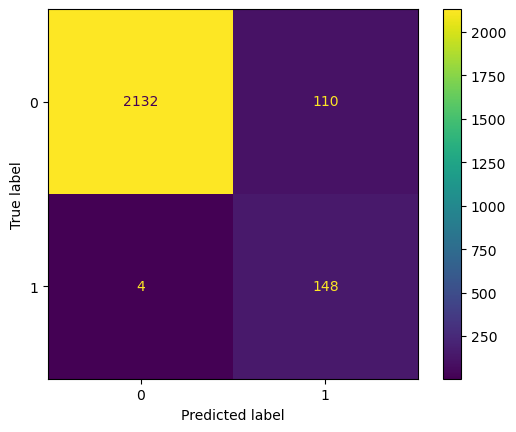

In [27]:
y_pred = clf.predict(X_valid)
print(classification_report(y_pred, y_valid))
plot_confusion_matrix(clf, X_valid, y_valid)

In [36]:
y_prob = clf.predict_proba(X_test)
y_prob_pred = list()

for prob in y_prob:
    y_prob_pred.append(prob[1])

y_out = pd.DataFrame(data=X_test.index,columns=["Id"])
y_out["Predicted"]=y_prob_pred
y_out.head()

,Id,Predicted
0,32_175413_295037,0.129866
1,33_176176_296681,0.018472
2,42_119203_210828,0.021393
3,44_181750_291554,0.003586
4,61_176332_252348,0.038856


In [37]:
y_out.to_csv("L2_trial.csv", index=False)